In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import flowio
import flowutils
import numpy as np
import pandas as pd

In [3]:
from sklearn.neighbors.kde import KernelDensity

In [4]:
import warnings
warnings.simplefilter('ignore', UserWarning)

## Helper functions

In [5]:
def fcs_to_df(f):
    """Convert FCS file to DataFrame."""
    
    fd = flowio.FlowData(f)
    events = np.reshape(fd.events, (-1, fd.channel_count))
    names = []
    for channel in sorted(fd.channels, key=lambda x: int(x)):
        meta = fd.channels[channel]
        if 'PnS' in meta:
            info = meta['PnS']
        else:
            info = meta['PnN']
        names.append(info)

    df = pd.DataFrame(events, columns=names)
    return df

In [6]:
def scatter(x, y, data):
    """Make a simple scatter plot."""
    
    u, v = data[x], data[y]
    h = u.ptp()/100
    
    X = np.c_[u, v]
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)
    z = kde.score_samples(X)
    
    ax = plt.subplot(111)
    ax.scatter(u, v, c=z, s=1, edgecolors='none', cmap='jet')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.axis('square')

## FCS file

In [7]:
f = '/data/flow/boston2018/flow27parameter_indexed.fcs'

In [8]:
df = fcs_to_df(f)

In [9]:
list(zip(range(100), df.columns))

[(0, 'Events'),
 (1, 'FSC-A'),
 (2, 'SSC-A'),
 (3, 'CD45RA_BB515'),
 (4, 'CD94_BB630'),
 (5, 'CD195_BB660'),
 (6, 'CD8_PerCP-Cy55'),
 (7, 'CD38_BB790'),
 (8, 'CD127_AF647'),
 (9, 'CD56_APCR700'),
 (10, 'HLADR_APCCy7'),
 (11, 'CD32_BUV395'),
 (12, 'CD16_BUV496'),
 (13, 'CD19_BUV563'),
 (14, 'IgD_BUV615'),
 (15, 'CD4_BUV661'),
 (16, 'CD64_BUV737'),
 (17, 'CD14_BUV805'),
 (18, 'CD11c_PE'),
 (19, 'CD13_PECF594'),
 (20, 'CD123_PECy5'),
 (21, 'PE-Cy5_5-A'),
 (22, 'CD25_PECy7'),
 (23, 'CD57_BV421'),
 (24, 'CD3_BV480'),
 (25, 'BV570-A'),
 (26, 'BV605-A'),
 (27, 'CD15_BV650'),
 (28, 'CD27_BV711'),
 (29, 'CD20_BV750'),
 (30, 'CD197_BV786'),
 (31, 'File_number'),
 (32, 'Events')]

In [10]:
df.shape

(405472, 33)

In [13]:
df.drop(['Events', 'File_number'], axis=1, inplace=True)

In [14]:
df.to_feather('/data/flow/boston2018/flow27parameter_indexed.feather')

## Clean up data set and reduce # events

In [11]:
df_ = df.sample(10000, replace=False)

In [13]:
df_.head()

,FSC-A,SSC-A,CD45RA_BB515,CD94_BB630,CD195_BB660,CD8_PerCP-Cy55,CD38_BB790,CD127_AF647,CD56_APCR700,HLADR_APCCy7,...,PE-Cy5_5-A,CD25_PECy7,CD57_BV421,CD3_BV480,BV570-A,BV605-A,CD15_BV650,CD27_BV711,CD20_BV750,CD197_BV786
204477,148245.484375,8.014721,1.808875,2.416663,0.608822,0.517012,1.566940,0.386233,1.363726,0.266526,...,-1.529484,0.629885,4.614459,4.564982,-2.377745,2.277947,4.915054,-0.619785,0.388958,0.168906
77225,117990.023438,7.542601,0.751251,1.195494,0.424912,0.601654,0.436415,0.485443,0.933366,-0.866790,...,-2.425989,0.489318,4.026452,2.074240,0.993690,0.230392,4.319390,-0.244336,0.009288,0.094095
281486,281376.968750,7.755479,2.236461,1.945007,0.313940,0.252220,0.796142,0.298520,2.044558,1.501825,...,-1.441334,2.148601,3.995782,3.856745,2.989640,-1.352890,2.780144,0.353688,0.001462,1.517923
216133,150623.343750,7.699108,1.830335,1.997651,0.362106,-0.435342,1.409980,1.089682,1.397990,-0.337507,...,2.421997,0.007860,4.527243,2.308951,0.946794,1.915311,5.067905,-0.164543,0.253317,0.599457
40729,61161.859375,5.673355,2.299802,0.678808,0.168054,2.277815,1.224281,1.684364,1.867924,-0.764497,...,3.428563,1.733054,1.199199,5.890022,2.291241,-1.370636,-0.254689,2.442629,-0.090855,0.662325


## Make simple plot to visualize data

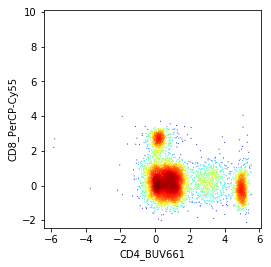

In [14]:
scatter(x='CD4_BUV661', y='CD8_PerCP-Cy55', data=df_)